In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
CPoses = pd.read_csv("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/poses/02.txt",delimiter=' ', header=None)
CPoses.head()
# CPoses.shape

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,9.043683e-12,2.326809e-11,1.110223e-16,9.043683e-12,1.000000,2.392370e-10,3.330669e-16,2.326810e-11,2.392370e-10,1.000000,-2.220446e-16
1,0.999997,-2.220141e-03,-1.303943e-03,5.542524e-03,2.223603e-03,0.999994,2.659561e-03,-3.047694e-02,1.298030e-03,-2.662451e-03,0.999996,1.528975e+00
2,0.999992,-3.006968e-03,-2.825820e-03,5.664279e-03,3.016952e-03,0.999989,3.535540e-03,-6.012991e-02,2.815159e-03,-3.544035e-03,0.999990,3.052409e+00
3,0.999989,-2.128535e-03,-4.205819e-03,3.267206e-03,2.141750e-03,0.999993,3.139851e-03,-8.838230e-02,4.199105e-03,-3.148823e-03,0.999986,4.566315e+00
4,0.999983,-1.524541e-03,-5.643893e-03,-6.648871e-03,1.542552e-03,0.999994,3.188330e-03,-1.107150e-01,5.638997e-03,-3.196981e-03,0.999979,6.079413e+00


In [4]:
#getting the init pose of the camera Rot and Translation
initPose=np.array(CPoses.iloc[0]).reshape(3,4)
print(initPose.shape)
print(initPose)
#These are ground truth

(3, 4)
[[ 1.000000e+00  9.043683e-12  2.326809e-11  1.110223e-16]
 [ 9.043683e-12  1.000000e+00  2.392370e-10  3.330669e-16]
 [ 2.326810e-11  2.392370e-10  9.999999e-01 -2.220446e-16]]


In [5]:
gtpoints = np.zeros((len(CPoses), 3, 4))
for i in range(len(CPoses)):
    gtpoints[i] = np.array(CPoses.iloc[i]).reshape((3, 4))


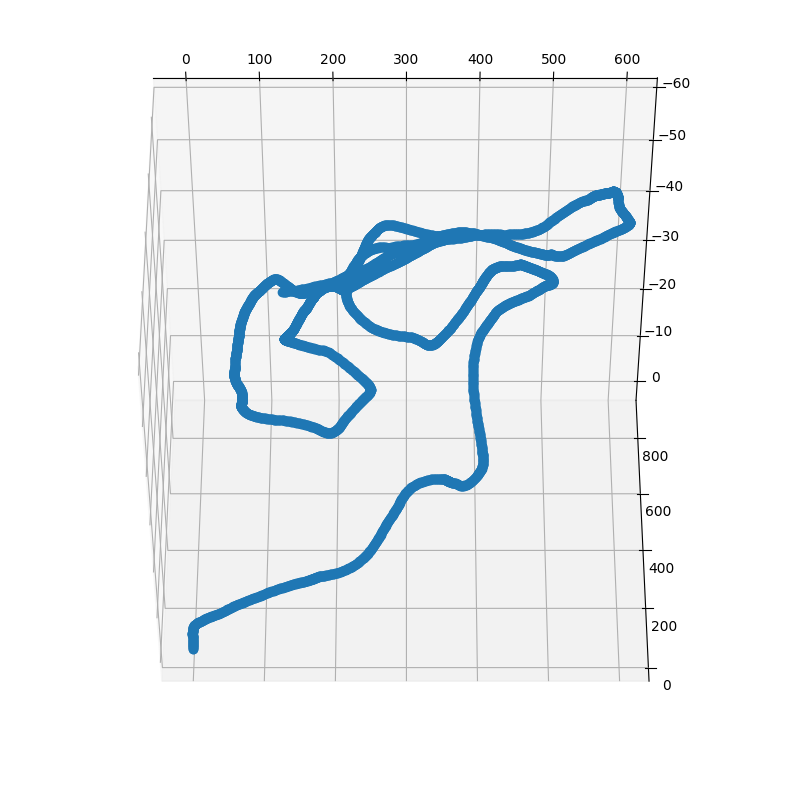

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(gtpoints[:, :, 3][:, 0], gtpoints[:, :, 3][:, 1], gtpoints[:, :, 3][:, 2],'o')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
ax.view_init(elev=-40, azim=270)

In [7]:
PMatrix=pd.read_csv('C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/calib.txt',delimiter=' ',header=None,index_col=0)
PMatrix

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,718.856,0.0,607.1928,0.00000,0.0,718.856,185.2157,0.000000,0.0,0.0,1.0,0.000000
P1:,718.856,0.0,607.1928,-386.14480,0.0,718.856,185.2157,0.000000,0.0,0.0,1.0,0.000000
P2:,718.856,0.0,607.1928,45.38225,0.0,718.856,185.2157,-0.113089,0.0,0.0,1.0,0.003780
P3:,718.856,0.0,607.1928,-337.28770,0.0,718.856,185.2157,2.369057,0.0,0.0,1.0,0.004915


In [8]:
# P = K [R|T]
P=open("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/00/calib.txt").readlines()
Pa=(P[1].split())
Pb=(P[0].split())
num = [float(x) for x in Pa[1:]]
num2= [float(x) for x in Pb[1:]]
P1=np.array(num).reshape(3,4)
P2=np.array(num2).reshape(3,4)
print("Left Camera",P1,"\n","RIGHT CAMERA",P2)

Left Camera [[ 718.856     0.      607.1928 -386.1448]
 [   0.      718.856   185.2157    0.    ]
 [   0.        0.        1.        0.    ]] 
 RIGHT CAMERA [[718.856    0.     607.1928   0.    ]
 [  0.     718.856  185.2157   0.    ]
 [  0.       0.       1.       0.    ]]


In [9]:
Pmat=np.array(PMatrix.loc['P1:']).reshape(3,4)
Pmat2=np.array(PMatrix.loc['P0:']).reshape(3,4)
Pmat

array([[ 718.856 ,    0.    ,  607.1928, -386.1448],
       [   0.    ,  718.856 ,  185.2157,    0.    ],
       [   0.    ,    0.    ,    1.    ,    0.    ]])

In [10]:
K1=np.linalg.pinv(initPose)
K1.shape

(4, 3)

In [11]:
######################## CAMERA CALIBRATION ####################


In [12]:
#Load Dataset
import os
filedir="C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_0/"
img_num="000000"
imgf=filedir+img_num+".png"
# print(imgf)
a=cv2.imread(imgf)
cv2.imshow("Image",a)
cv2.waitKey()
cv2.destroyAllWindows()



In [13]:
#To find K r and T from Projection Matrix P1 from camera 1 (Right sided)
k,r,t,_,_,_,_=cv2.decomposeProjectionMatrix(Pmat)
k1,r1,t1,_,_,_,_=cv2.decomposeProjectionMatrix(Pmat2)
print("Intrinsic Matrix of Left Camera \n",k)
print("Intrinsic Matrix of Right Camera \n",k1)
print("Rotation Matrix \n",r)
print("Rotation Matrix Right \n",r1)
# print("Translation Vector \n",t)
t=t/t[3]
t1=t1/t1[3]
print("Translation Vector \n",t)
print("Translation Vector Right Camera \n",t1)

Intrinsic Matrix of Left Camera 
 [[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
Intrinsic Matrix of Right Camera 
 [[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
Rotation Matrix 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Rotation Matrix Right 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Translation Vector 
 [[ 5.37165719e-001]
 [ 1.40649083e-017]
 [-4.94065646e-324]
 [ 1.00000000e+000]]
Translation Vector Right Camera 
 [[0.]
 [0.]
 [0.]
 [1.]]


In [14]:
Rt = np.hstack([r, t[:3]])
origin = np.array([0, 0, 0, 1])
RotTrans1=Rt.dot(origin).reshape(-1,1)

Rt2 = np.hstack([r1, t1[:3]])
RotTrans2=Rt2.dot(origin).reshape(-1,1)

print(RotTrans1,"\n",RotTrans2)

[[ 5.37165719e-001]
 [ 1.40649083e-017]
 [-4.94065646e-324]] 
 [[0.]
 [0.]
 [0.]]


In [15]:
#We are given with rectified projection matrix , thus the value is on the lef camera with
#Right camera as global. Now we find the homogenous matrix to identify the global coordinates
#of the given camera.This is to shift the  rectified matrix to normal matrix.
origin=np.array([0,0,0,1])
RT_new=np.vstack([Rt,origin])
H_mat=np.linalg.inv(RT_new)
H_mat

array([[ 1.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        -5.37165719e-001],
       [ 0.00000000e+000,  1.00000000e+000,  0.00000000e+000,
        -1.40649083e-017],
       [ 0.00000000e+000,  0.00000000e+000,  1.00000000e+000,
         4.94065646e-324],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         1.00000000e+000]])

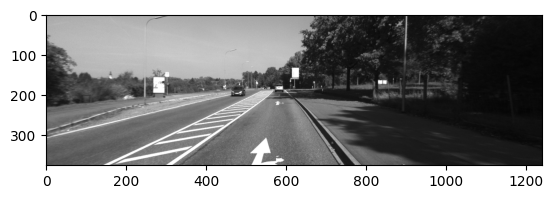

In [16]:
##############STEREO CALIBRATION #############################
#Loading the images form 02 Dataset
imgL1=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_0/000000.png")
imgR1=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_1/000000.png")
imgL2=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_0/000001.png")
imgR2=cv2.imread("C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/image_1/000001.png")

ProjMat=P1
ProjMat2=P2
plt.imshow(imgR2)
cv2.waitKey()
cv2.destroyAllWindows()

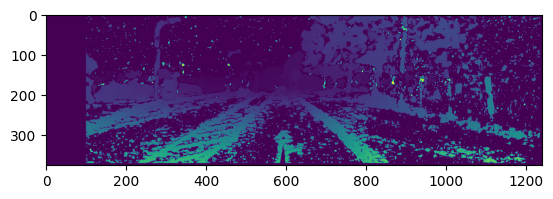

In [17]:
#Computing Disparity for the stereo since these are already rectified
#Sliding window
maxdisp=20
def computedisparity(img1,img2,blk=10):
    matcher = cv2.StereoSGBM_create(numDisparities=96,
                                        minDisparity=0,
                                        blockSize=11,
                                        P1 = 8 * 3 * 6 ** 2,
                                        P2 = 32 * 3 * 6 ** 2,
                                        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
                                       )
    disp_map=matcher.compute(img1,img2).astype(np.float32)/16
#     hn, wn = img1.shape[0],img1.shape[1]
#     disp_map = np.zeros((hn, wn), dtype=np.float32)
#     #We are taking the block size to be the size of matrix to compare image patches 
#     #since our blk size is not constant , we take a range from blk to height of image - blk. Iterating over (2*blk+1)
#     for i in range(blk,hn-blk-1):
#         for j in range(blk+maxdisp,wn-blk-1):
#             min_ssd = np.zeros([maxdisp,1])
#             # min_norm=np.zeros([maxdisp,1])
#             ha=img1[(i-blk):(i+blk),(j-blk):(j+blk)]
#             for m in range(0,maxdisp):
#                 ra=img2[(i-blk):(i+blk),(j-m-blk):(j-m+blk)]
#                 min_ssd[m]=np.sum((ha[:,:]-ra[:,:])**2)
#                 # min_norm[m] = np.sum(ha * ra) / (np.sqrt(np.sum(ha**2)) * np.sqrt(np.sum(ra**2)) + (1e-5))
#             disp_map[i, j] = np.argmin(min_ssd)
#             # disp_map[i,j]=np.argmax(min_norm)
    disp_map = (disp_map / disp_map.max()) * 255
    disp_map = disp_map.astype(np.uint8)

    # cv2.imwrite('Gray_diparity_of_dataset.png', disp_map)
    return disp_map
dmap=computedisparity(imgR1,imgL1)
# plt.imshow(dmap)

imgr=cv2.cvtColor(imgR1,cv2.COLOR_BGR2GRAY).astype(np.uint8)
imgl=cv2.cvtColor(imgL1,cv2.COLOR_BGR2GRAY).astype(np.uint8)
matcher = cv2.StereoBM_create(numDisparities=96,blockSize=11)
a=matcher.compute(imgl,imgr).astype(np.float32)/16
plt.imshow(a)

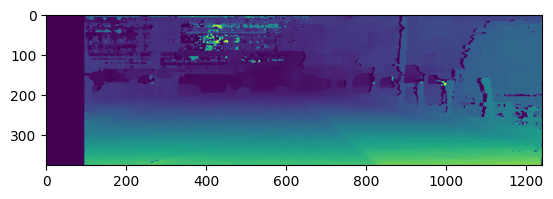

In [18]:
matcher = cv2.StereoSGBM_create(numDisparities=96,
                                        minDisparity=0,
                                        blockSize=11,
                                        P1 = 8 * 3 * 6 ** 2,
                                        P2 = 32 * 3 * 6 ** 2,
                                        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
                                       )
b=matcher.compute(imgl,imgr).astype(np.float32)/16
plt.imshow(b)

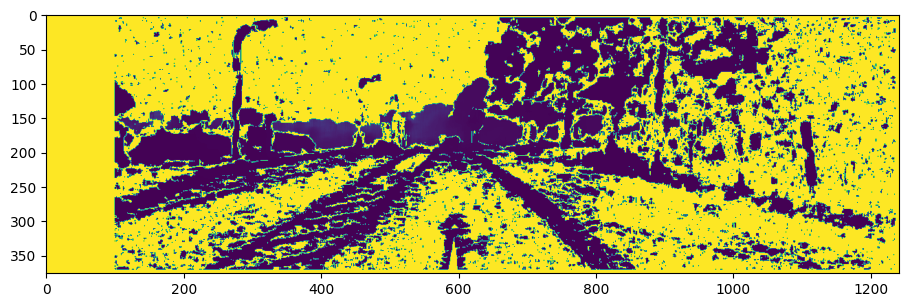

In [19]:
def computedepth(K,t_r,t_l,dmap):
    focal=K[0][0]
    baseline=t_r[0] - t_l[0]
    dmap[dmap == 0.0] = 0.1
    dmap[dmap == -1.0] = 0.1
    depth = np.ones(shape=dmap.shape).astype(float)
    depth= (focal*baseline)/(dmap)
#     img_depth = ((depth/depth.max())*255).astype(np.uint8)
    return depth

def decomposePmat(P):
    k,r,t,_,_,_,_=cv2.decomposeProjectionMatrix(P)
    t=(t/t[3])[:3]
    return k,r,t

kl,rl,tl=decomposePmat(Pmat)
kr,rr,tr=decomposePmat(Pmat2)
# print(tl,"\n",tr)
d=computedepth(kl,tl,tr,a)
# d=d.astype(float)
# d/=np.max(d)
plt.figure(figsize=(11,7))
plt.imshow(d)

In [20]:
d.max()
# kl[0][0] * (tr[0] - tl[0]) / 0.1

3861.447942459941

In [21]:
def filter_matches_distance(matches, dist_threshold=0.8):
    """
    Filter matched features from two images by distance between the best matches

    Arguments:
    match -- list of matched features from two images
    dist_threshold -- maximum allowed relative distance between the best matches, (0.0, 1.0) 

    Returns:
    filtered_match -- list of good matches, satisfying the distance threshold
    """
    filtered_match = []
#     print(matches)
    for m, n in matches:
        if m.distance <= dist_threshold*n.distance:
            filtered_match.append(m)

    return filtered_match

288


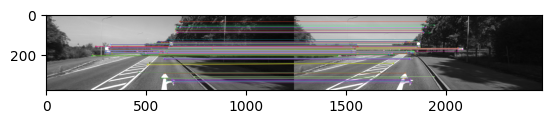

In [27]:
######################### FEATURE MATCHING ######################
# For Visual Odometry and SLAM, feature mapping has to be done in a quicker rate as the 
#environment is dynamic and constant changes in features are noticebale.
# Two of the best feature matching techniques that can be used are ORB and FAST.
def ORB(img1,img2):
    orb=cv2.ORB_create()
    key1=orb.detect(img1,None)
    key2=orb.detect(img2,None)
    key1,des1=orb.detectAndCompute(img1,None)
    key2,des2=orb.detectAndCompute(img2,None)
#     img1=cv2.drawKeypoints(img1,key1,None,color=(255,0,0),flags=0)
#     img2=cv2.drawKeypoints(img2,key2,None,color=(255,0,0),flags=0)
#     fig, axs = plt.subplots(1, 2)
#     axs[0].imshow(img1)
#     axs[1].imshow(img2)
    matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING2, crossCheck=False)
    matches = matcher.knnMatch(des1, des2, k=2)
    matches = filter_matches_distance(matches)
    print(len(matches))
    img_matches = cv2.drawMatches(img1, key1, img2, key2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img_matches)
    return img_matches,matches,key1,key2

im1,matches,key1,key2=ORB(imgl,imgr)
# plt.imshow(im1)
# plt.imshow(im2)

Threshold: 20
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 2472
2686


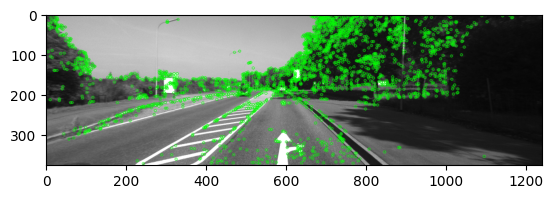

In [28]:
# FAST ALGORITHM 
def FAST(img1,img2):
    fast = cv2.FastFeatureDetector_create()
    fast.setThreshold(20)
    kp1=fast.detect(img1,None)
    kp2=fast.detect(img2,None)
    img1=cv2.drawKeypoints(img1,kp1,None,color=(0,255,0),flags=0)
    img2=cv2.drawKeypoints(img2,kp2,None,color=(0,255,0),flags=0)
    print( "Threshold: {}".format(fast.getThreshold()) )
    print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
    print( "neighborhood: {}".format(fast.getType()) )
    print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp1)) )
#     fig, axs = plt.subplots(1, 2)
#     axs[0].imshow(img1)
#     axs[1].imshow(img2)
    
    return img1,img2,kp1,kp2
im1,im2,kp1,kp2=FAST(imgl,imgr)
plt.imshow(im1)
print(len(kp2))

In [24]:
# TILE_H = 10
# TILE_W = 20
# H,W = imgl.shape
# kp = []
# kp2 = []
# idx = 0
# fastFeatureEngine = cv2.FastFeatureDetector_create()

# for y in range(0, H, TILE_H):
#     for x in range(0, W, TILE_W):
#         imPatch = imgl[y:y+TILE_H, x:x+TILE_W]
#         impatch2= imgr[y:y+TILE_H, x:x+TILE_W]
#         keypoints = fastFeatureEngine.detect(imPatch)
#         keypoints2 = fastFeatureEngine.detect(impatch2)
#         for pt in keypoints:
#             pt.pt = (pt.pt[0] + x, pt.pt[1] + y)
#         for pt in keypoints2:
#             pt.pt = (pt.pt[0] + x, pt.pt[1] + y)

#         if (len(keypoints) > 10):
#             keypoints = sorted(keypoints, key=lambda x: -x.response)
#             keypoints2 = sorted(keypoints2, key=lambda x: -x.response)
#             for kpt in keypoints[0:10]:
#                 kp.append(kpt)
#             for kpt2 in keypoints2[0:10]:
#                 kp2.append(kpt2)
#         else:
#             for kpt in keypoints:
#                 kp.append(kpt)
#             for kpt2 in keypoints2:
#                 kp2.append(kpt2)
# ftDebug = imgl
# ftDebug = cv2.drawKeypoints(imgl, kp, ftDebug, color=(255,0,0))
# ftDebug2 = cv2.drawKeypoints(imgr, kp2, ftDebug, color=(255,0,0))
# plt.imshow(ftDebug2)
# print(len(kp))

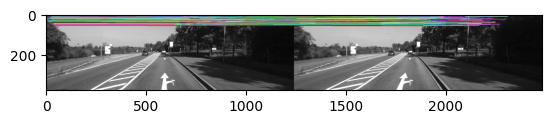

In [25]:
def draw_matches(img1, kp1, img2, kp2, matches):
    # Draw matches between two images
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB) # convert to RGB format
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB) # convert to RGB format
    vis = np.zeros((max(h1, h2), w1+w2, 3), dtype=np.uint8)
    vis[:h1, :w1] = img1
    vis[:h2, w1:w1+w2] = img2
    vis = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)

    for m in matches:
        # Get the matching keypoints for each image
        img1_idx = m.queryIdx
        img2_idx = m.trainIdx
        (x1, y1) = kp1[img1_idx].pt
        (x2, y2) = kp2[img2_idx].pt

        # Draw the matches
        color = tuple(np.random.randint(0, 255, 3).tolist())
        cv2.line(vis, (int(x1), int(y1)), (int(x2)+w1, int(y2)), color, thickness=2)

    plt.imshow(vis)
    plt.show()
    
draw_matches(imgl, kp1, imgr, kp2, matches)

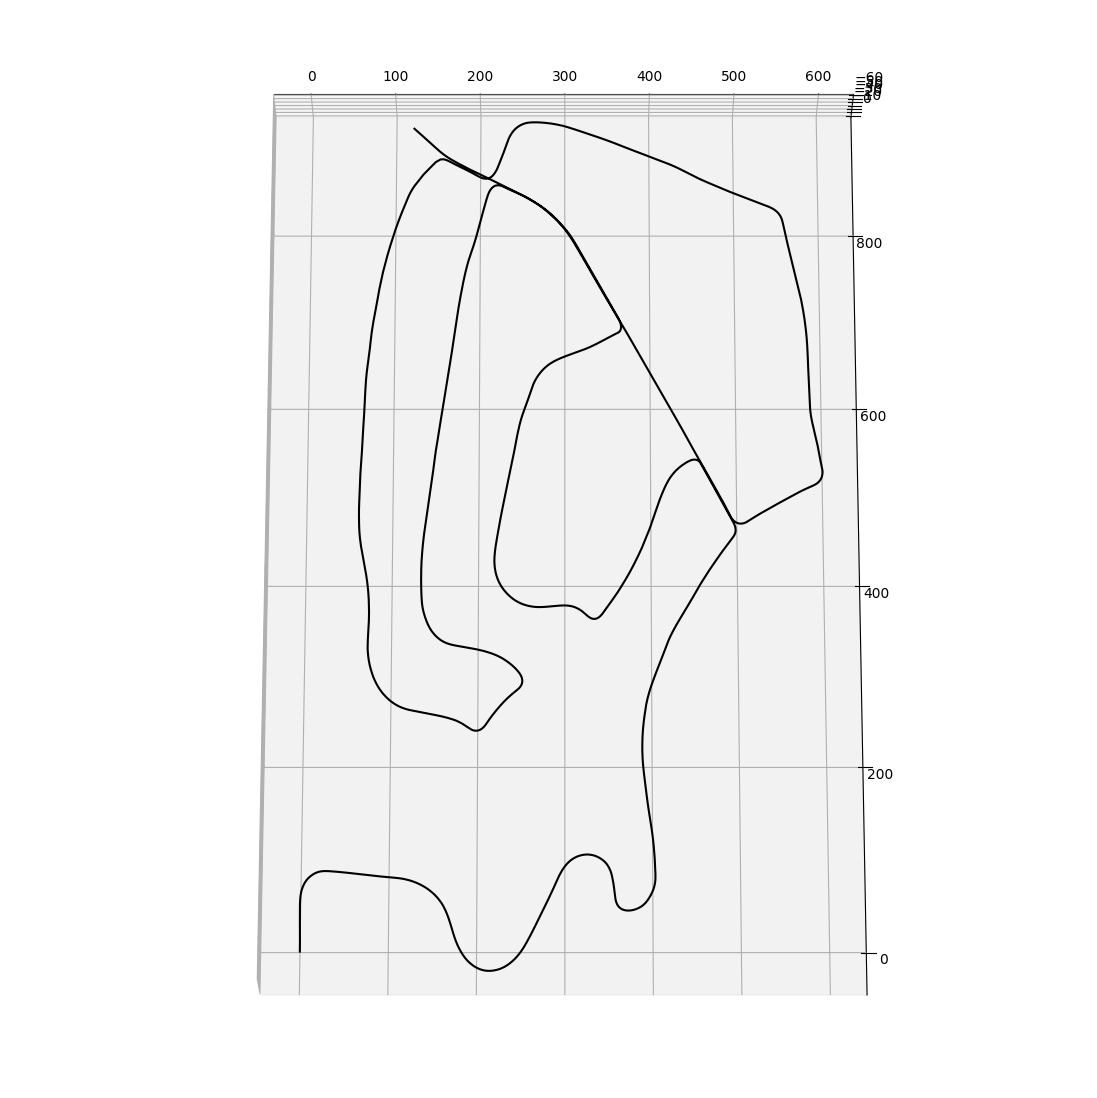

In [25]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=-20, azim=270)
xs = gtpoints[:, 0, 3]
ys = gtpoints[:, 1, 3]
zs = gtpoints[:, 2, 3]
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))
ax.plot(xs, ys, zs, c='k')

In [26]:
filedir1="C:/Users/achkr/OneDrive/Desktop/ENPM673/VisualOdom/dataset/sequences/02/"
image_file_left=os.listdir(filedir1+'image_1')
image_file_right=os.listdir(filedir1+'image_0')
timel=np.array(pd.read_csv(filedir1+'times.txt',delimiter=' ',header=None))
frames=len(image_file_left)

In [27]:
T_tot = np.eye(4)
trajectory = np.zeros((frames, 3, 4))
trajectory[0] = T_tot[:3, :]
imheight = imgL1.shape[0]
imwidth = imgL1.shape[1]

In [28]:
images_left = []
images_right = []
pointclouds = []
for i, name_left in enumerate(image_file_left):
    name_right = image_file_right[i]
    images_left.append(cv2.imread(filedir1+ 'image_0/' + name_left))
    images_right.append(cv2.imread(filedir1 + 'image_1/' + name_right))

In [33]:
# %matplotlib notebook

<IPython.core.display.Javascript object>


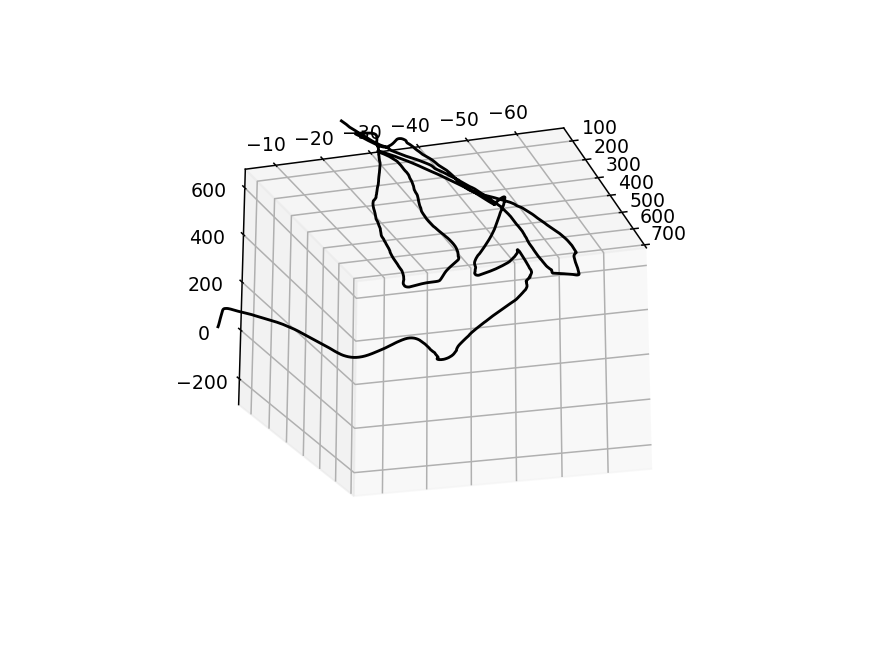

In [35]:
xs=[]
ys=[]
zs=[]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=-20, azim=270)
# xsa = gtpoints[:, 0, 3]
# ysa = gtpoints[:, 1, 3]
# zsa = gtpoints[:, 2, 3]
# ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))
ax.plot(gtpoints[:, 0, 3], gtpoints[:, 1, 3], gtpoints[:, 2, 3], c='k')
poses=(gt for gt in gtpoints)
for i in range(frames - 1):
    # Stop if we've reached the second to last frame, since we need two sequential frames
    #if i == num_frames - 1:
    #    break
    # Start timer for frame
#     start = datetime.datetime.now()
    # Get our stereo images for depth estimation
#     if handler.low_memory:
#         image_left = image_plus1
#         image_right = next(handler.images_right)
#         # Get next frame in the left camera for visual odometry
#         image_plus1 = next(handler.images_left)
    image_left = images_left[i]
    image_right = images_right[i]
    # Get next frame in the left camera for visual odometry
    image_plus1 = image_file_left[i+1]
    disp=computedisparity(image_left,image_right)
#     disp/=disp.max()
#     for pose in poses:
#         xs.append(pose[0,3])
#         ys.append(pose[1,3])
#         zs.append(pose[2,3])
#         ax.plot(xs, ys, zs, c='chartreuse')
#         plt.pause(1e-32)
    cv2.imshow("camera",image_left)
#     cv2.waitKey(1)
cv2.destroyAllWindows()

In [38]:
## Optical flow and motion estimation using 3d projection
#Attempt with Lucas Kanade Sliding window technique
trackpts1=np.zeros((len(key1),1,2))
cv2.calcOpticalFlowPyrLK()

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'calcOpticalFlowPyrLK'
> Overload resolution failed:
>  - calcOpticalFlowPyrLK() missing required argument 'prevImg' (pos 1)
>  - calcOpticalFlowPyrLK() missing required argument 'prevImg' (pos 1)
